### Problem statement
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [225]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import  DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn import preprocessing
from sklearn.metrics import f1_score

In [226]:
df = pd.read_csv("Fraud_check.csv")

In [227]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [228]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [229]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [230]:
df.shape

(600, 6)

In [231]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [232]:
df1=df.drop(['Undergrad','Marital.Status','Urban'],axis=1)
df1

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


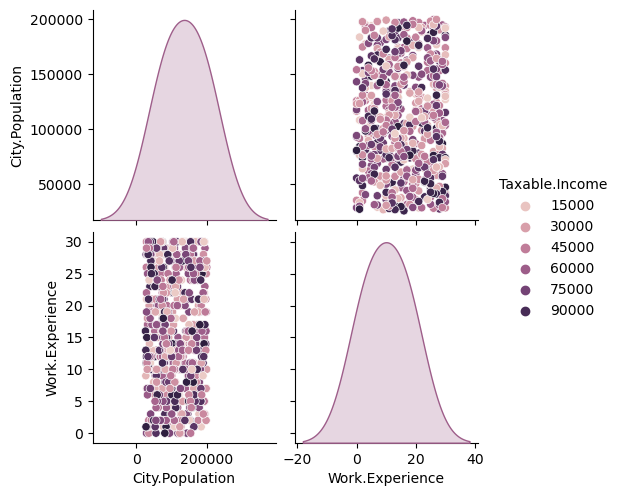

In [233]:
import seaborn as sns
sns.pairplot(data=df1, hue = 'Taxable.Income')

In [234]:
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [235]:
df1.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [236]:
df1.isnull().sum()

Taxable.Income     0
City.Population    0
Work.Experience    0
dtype: int64

In [237]:
new_data=pd.DataFrame(df)
new_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [238]:
data=new_data.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"tax_income","City.Population":"city_pop","Work.Experience":"work_exp"},inplace=True)

In [239]:
new_data

,Undergrad,marital_status,tax_income,city_pop,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [242]:
new_data["tax_status"]=np.where(new_data['tax_income']<=30000,'Risky','Good')
new_data.head()

,Undergrad,marital_status,tax_income,city_pop,work_exp,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [243]:
new_data.tax_status.unique()

array(['Good', 'Risky'], dtype=object)

In [244]:
new_data.drop(['tax_income','city_pop'],axis=1,inplace=True)
new_data

,Undergrad,marital_status,work_exp,Urban,tax_status
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [245]:
from sklearn.preprocessing import LabelEncoder

In [246]:
label=LabelEncoder()

In [247]:
new_data['Undergrad']=label.fit_transform(new_data['Undergrad'])
new_data['marital_status']=label.fit_transform(new_data['marital_status'])
new_data['Urban']=label.fit_transform(new_data['Urban'])

In [248]:
new_data.head()

,Undergrad,marital_status,work_exp,Urban,tax_status
0,0,2,10,1,Good
1,1,0,18,1,Good
2,0,1,30,1,Good
3,1,2,15,1,Good
4,0,1,28,0,Good


In [249]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    int32 
 1   marital_status  600 non-null    int32 
 2   work_exp        600 non-null    int64 
 3   Urban           600 non-null    int32 
 4   tax_status      600 non-null    object
dtypes: int32(3), int64(1), object(1)
memory usage: 16.5+ KB


In [250]:
x=new_data.iloc[:,:4]
x

,Undergrad,marital_status,work_exp,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [251]:
y=new_data.iloc[:,-1]
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [252]:
new_data.tax_status.value_counts()

tax_status
Good     476
Risky    124
Name: count, dtype: int64

# Building Decisiontree classifier

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [254]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [255]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [262]:
model.get_n_leaves()

7

In [263]:
y_pred=model.predict(x_test)
pd.Series(y_pred).value_counts()

Good    120
Name: count, dtype: int64

In [264]:
np.mean(y_pred==y_test)

0.7666666666666667

# Visualization

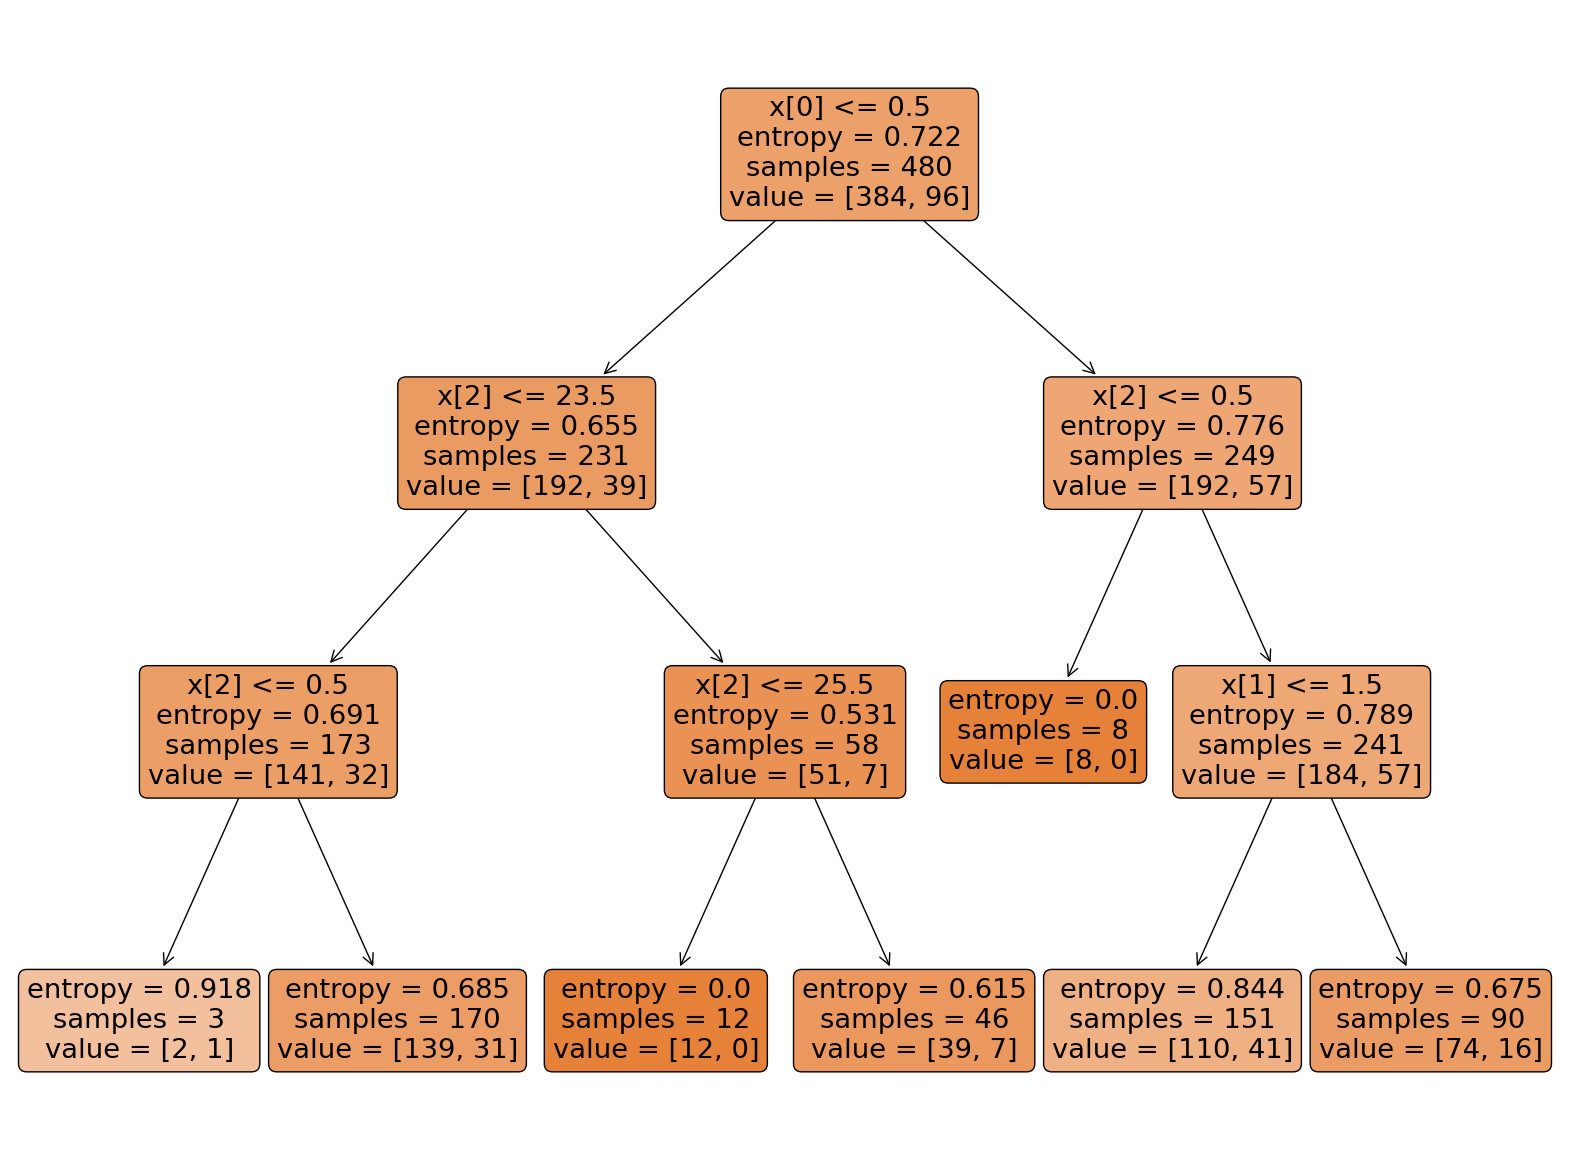

In [265]:
plt.figure(figsize=(20,15))
plot_tree(model,rounded=True,filled=True)
plt.show()

In [266]:
pd.crosstab(y_test,y_pred)

col_0,Good
tax_status,
Good,92
Risky,28


In [267]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



In [260]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [173]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [174]:
y_pred=model_gini.predict(x_test)
np.mean(y_pred==y_test)

1.0

In [175]:
model_gini.get_n_leaves()

2

In [176]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



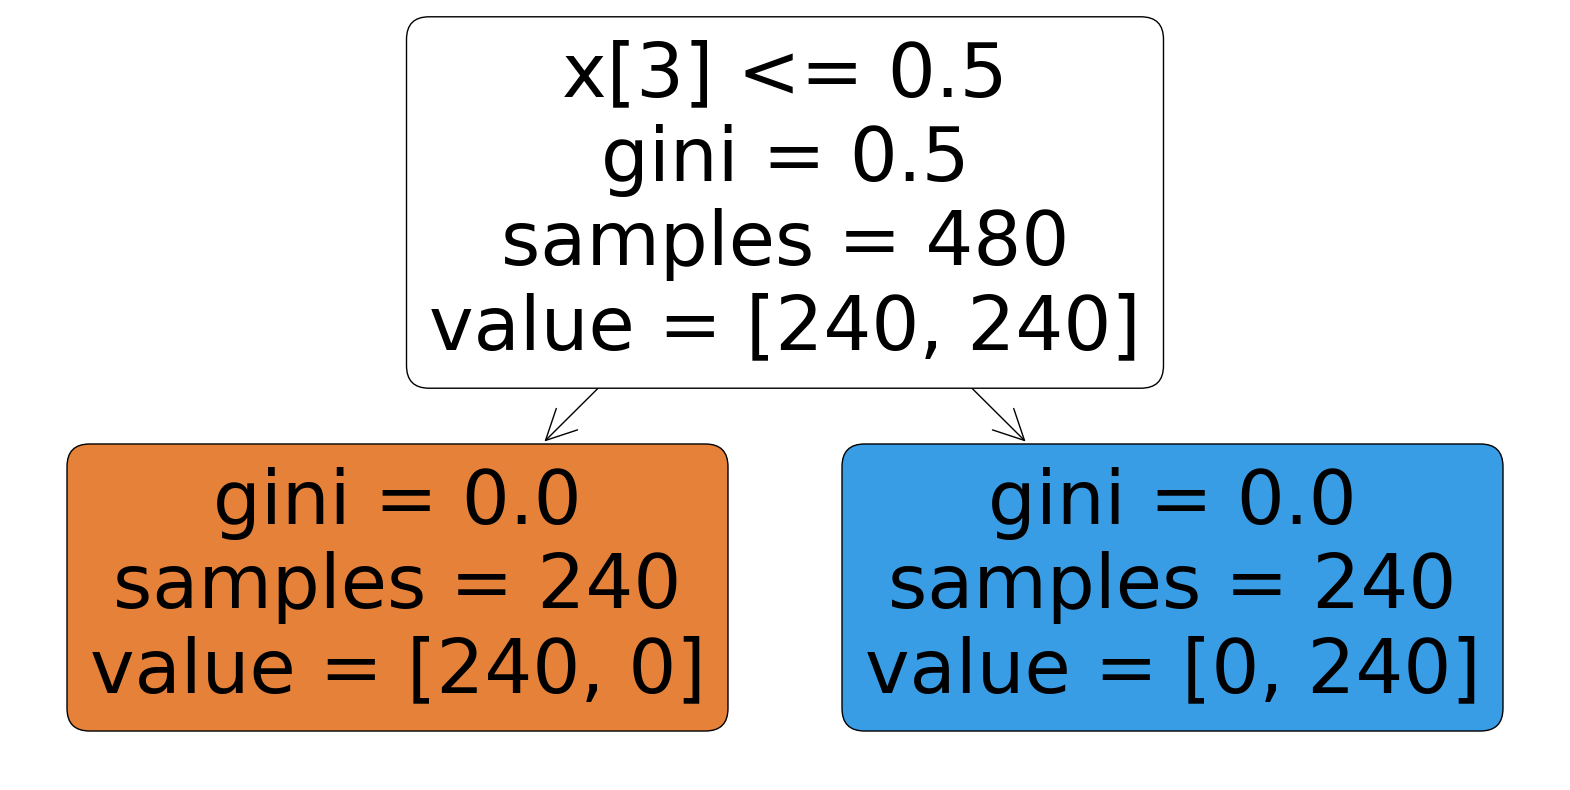

In [177]:
plt.figure(figsize=(20,10))
plot_tree(model_gini,rounded=True,filled=True)
plt.show()

# Using GridSearchCv

In [178]:
print(tree.export_text(model_gini))

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- class: 1



In [179]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

In [180]:
grid_search=GridSearchCV(model_gini,params,verbose=2)

In [181]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [182]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

# Decision tree Regression

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [184]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()